# Making a Canopy Height Model (CHM) Using USGS 3D Elevation Program (3DEP) Data


<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Authors</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href= "Define-Functions" data-toc-modified-id="Define-Functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define Functions</a></span></ul><li><span><a href="#Data-Access-and-Visualization" data-toc-modified-id="Data-Access-and-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Access and Visualization</a></span><ul class="toc-item"><li><span><a href="#Access-3DEP-Data" data-toc-modified-id="Access-3DEP-Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Access 3DEP Data</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-And-Define-AOI" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create Interactive Ipyleaflet Map and Define AOI</a></span></li><li><span><a href="Find-Intersecting-3DEP-Polygons" data-toc-modified-id="Find-Interseciting-3DEP-Polygons-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Find Intersecting 3DEP Polygons</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Resources</a></span></li></div>
    

<h2>Authors</h2>
<a id='#Authors'></a>

<h2>Purpose</h2>
<a id='#Purpose'></a>

The United States Geological Survey's 3-D Elevation Program (3DEP)is an ongoing effort to provide high-quality topographic -- light detection and ranging (lidar) -- data for the entire conterminous United States, Hawaii, the U.S territories, and Interferometric Synthetic Aperture Radar (IfSAR) for Alaska over an 8-year period. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of >42 trillion points covering an area of > 6 million $km^{2}$ already available for use.

3DEP point cloud data can be downloaded on the web from a variety of resources including the <a href="https://portal.opentopography.org/datasets">OpenTopography Portal</a> (restricted to academic users) and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. Due to limited computational resources, these web services implement limits on the spatial extent over which point cloud data may be accessed for a single job. In some cases, however, it may benefit users seeking raw, uprocessed point cloud data over large extents to be able to programmatically access, process, and visualize 3DEP point cloud data from a specific area of interest on their local workstation without the web service limitations. 

This Jupyter notebook is one of two developed focusing on enhancing access and usability of 3DEP data and derivative products. This notebook provides functions, pipelines, and overall workflow for effectively and efficiently accessing documents a Python-based workflow for accessing, processing, and visualizing 3DEP data, leveraging available APIs and cloud resources.

<h4>Specific features of this notebook</h4>

- Users may (1) select an area of interest (AOI) directly in an interactive map within this notebook; (2) import a shapefile or geoJSON file; or (3) directly input coordinate boundaries for their region of interest (**Not yet implemented**).

- The corresponding 3DEP point cloud dataset is accessed programmatically from the <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) public EPT (Entwine Point Tile) bucket</a>, implementing the user-defined AOI and made available for subsequent processing.

- Flexibile and customizable PDAL pipelines are available for reclassifying, filtering, and computing derivate products based on user-defined specifications.
 
- DTM and DSM generation with option to save (or not) point cloud data and/or DTM/DTM products.

- Canopy height model generated from DSM and DTM and saved to user's local file system.

<h4>Additional resources</h4>
Two additional Python-based workflow have been developed and are availble in Jupyter Notebook format for: <br>
  
1. <a href="http://localhost:8888/notebooks/notebooks/3DEP_pointcloud_access_processing_DTM_creation.ipynb#Programmatically-accessing,-processing,-and-visualizing-USGS-3D-Elevation-Program-(3DEP)-data-for-user-defined-area-of-interest.ipynb"> Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) data for user-defined area of interest </a>. <br>
    
2. <a href="https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Programmatically_accessing_3DEP_data_using_USGS_7.5_Quadrangles.ipynb"> Programmatically accessing, processing, and visualizing 3DEP data using USGS 7.5' Quadrangles</a>.
    
<h2>Funding</h2>
<a id='#Funding'></a>

<h2>Keywords</h2>
<a id='#Keywords'></a>

keywords=["OpenTopography","USGS", "3DEP", "PDAL"]

<h2>Citation</h2>


## 6. Setup

### 6.1 Getting Started
This notebook provides a self-contained workflow for accessing, processing, and visualizing 3DEP point cloud data. There are two options for performing this workflow:

1. Download this Jupyter notebook (.ipynb file) to your local file system. 
    - Create a virtual environement containing the required dependencies (see below).
    - Run Juypter notebook on local machine.
    - Data download limits will be dependent on user's available hard drive storage.
    <br/><br/>
2. Launch the interactive Jupyter notebook on Google Colaboratory.
    - Does not require creation of a virtual environment or installation on local filesystem.
    - Requires Google account and access to personal Google Drive folder.
    - Data download limits will be dependent on user's available Google Drive storage. 
    - If you wish to run this notebook in Google Colaboratory click the 'Open in Colab' badge below. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/Making_a_Canopy_Height_Model_Using_USGS_3DEP_Data.ipynb)

<h3> 6.1 Library Imports</h3>
<a id='#Library-Imports-6.1'></a>


### (Optional) - Run Notebook in Google Colaboratory Environment 

In [ ]:
### Exectute this block of cells if running on Google Colab
!git clone https://github.com/cmspeed/OT_3DEP_Workflows

In [ ]:
# Installs Conda, which is the easiest way to install PDAL in the Google Colab environment
# This will trigger a notification that the "Your session crashed for an unknown reason." 
# This is normal. Execute next cell.
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Import Conda and install PDAL ---- Takes 1-2 minutes
import condacolab
condacolab.check()
!mamba install -q python-pdal

In [ ]:
#  Install the remaining dependencies
!pip install -r OT_3DEP_Workflows/requirements.txt

In [ ]:
# Mount your Google Drive for saving content
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import Packages (Google Colab Only)
import os
import json
import pdal
import gdal
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import ipyleaflet
import ipywidgets as widgets
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform
import requests
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from tqdm import tqdm

In [ ]:
### Runtime must be restarted after the above executes before import of PDAL will be successful!
### On Google Colab ribbon click "Runtime" > "Restart Runtime".  
### Do not execute any of the previous cells. Execute the following cells only.

**If running Google Colab, proceed to 6.2 Define Functions, and do not run next cell (6.1.2)**

#### 6.1.2.  Option 2 - Install and Run Notebook on Local Machine

In [1]:
# Import Packages (Local Machine Only)
import os
import json
import pdal
from osgeo import gdal
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import ipyleaflet
import ipywidgets as widgets
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform
import requests
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from tqdm import tqdm

<h3>6.2 Define Functions</h3>
<a id='#Define-Functions-6.2'></a>

The functions below are used throughout the rest of the notebook and are included here for clarity.

```gcs_to_proj()``` is a function to project from geographic coordinates, WGS84 (EPSG: 4326), to Web Mercator projection (EPSG: 3857).

```import_shapefile_to_shapely()``` is a function to read a user's shapefile and make a shapely object.

```handle_draw()``` is a function for interactive drawing on ipyleaflet maps and storing the polygon for use in requesting point cloud data.

```build_pdal_pipeline()``` is a function used to construct the pdal pipeline to request/process the point cloud data from AWS ept public bucket.

```make_DEM_pipeline``` is a function used to construct pdal pipeline to perform steps in ```build_pdal_pipeline()``` and create a DEM (DSM or DTM) from the point cloud data.

These functions can be modified as the user sees fit; however, they are designed to work 'out of the box'.

**Modify this to reproject from ANY CRS to 3857** <br>
**Modify to use | for clarity**

In [2]:
def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG: 3857)). 
    
    :param poly: shapely polygon for user area of interest (AOI)
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)

def import_shapefile_to_shapely(path):
    """
    Conversion of shapefile to shapely object.
    
    :param path: location of shapefile on user's local filesystem
    """
    shapefile_path = path
    gdf = gpd.read_file(shapefile_path)
    user_shp = gdf.loc[0, 'geometry']
    user_shp_epsg3857 = gcs_to_proj(user_shp)
    user_AOI = [[user_shp, user_shp_epsg3857]]
    return user_AOI
    
def handle_draw(target, action, geo_json):
    """
    Allow user to draw area of interest (AOI) on interactive ipyleaflet map.
    
    :param extent_epsg3857: polygon for user-defined AOI
    :param usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps
    :param resolution: The desired resolution of the pointcloud based on the following definition:
    """
        
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds)
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857

def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, filterNoise = False,
                        reclassify = True, savePointCloud = True, pc_outName = 'filter_test', pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data.
    
    Parameters:
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                            usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                            either through the 'handle_draw' methor or by inputing their own coordinates.
                            This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                       this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is
    :param requested,the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
        this should be outType = ''
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """
    
    url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(usgs_3dep_dataset_name)
    
    ### TODO: Add an option to choose an output CRS
    ### TODO: Add option to output shapefile of the bounding box. 
    ### TODO: Consider restructuring pipeline construction with list comprehension
              #pipline = [dict(zip([1],[stage])) for x in range(1,len(stages))], or similar.
    ### Important note: smrf cannot be run in streaming mode
    ### TODO: Test performance in and out of streaming mode. Could create a execute_pipeline() 
        ###   that tests whether streaming is possible.
        
    #this is the basic pipeline which only accesses the 3DEP data. There is an optional
    pointcloud_pipeline = {
            "pipeline": [
                
                {
                    "type": "readers.ept",
                    "filename": str(url),
                    "polygon": str(extent_epsg3857),
                    "requests": 3,
                    "resolution": pc_resolution
                }
            ]
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }
        
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = True, savePointCloud = False, pc_outName = 'filter_test', 
                      pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', dem_outName = 'dem_test', 
                      dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering or reclassifying). The user must also specify whether the point 
    cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

    :param dem_resolution: Desired grid size (in meteres) for output raster DEM 
    :param filterNoise: Option to remove points from USGS Class 7 (noise).
    :param savePointCloud: Option to save (or not) the point cloud dataset.
    :param pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  this should be outType = ''
    :param demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
    :param gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'. ELABORATE MORE HERE.
    :param dem_outName: Desired name of DEM file on user's local filesystem.
    :param dem_outExt: DEM file extension. ELABORATE MORE HERE.
    :param driver: Driver used. ELABORATE MORE HERE.
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
    
    return dem_pipeline

## 7. Data Access and Visualization

<h3> 7.1 Access 3DEP Data Polygons</h3>
<a id='#Access-3DEP-Data-7.1'></a>

Executing the next two cells will allow you to select a Area of Interest (AOI) for which point cloud data will be retreived. The map includes a Geo
JSON file indicating where 3DEP point cloud data are available.

In [3]:
# Get GeoJSON file for 3DEP outlines from URL 

#this needs to be modified to always make a new pull, even if it exists because it is possible updated at the source.
url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
r = requests.get(url)
with open('resources.geojson', 'w') as f:
    f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    data = json.load(f)

geo_json_3DEP = ipyleaflet.GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 
                                       'weight':1.9, 'fillOpacity':0.1})

with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)

projected_geoms = []

print('projecting 3DEP polygons to web mercator (EPSG:3857)')
for geometry in tqdm(df['geometry']):
        projected_geoms.append(gcs_to_proj(geometry))

geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)
names = df['name']
urls = df['url']
num_points = df['count']

projecting 3DEP polygons to web mercator (EPSG:3857)


100%|█████████████████████████████████████████████| 1814/1814 [00:10<00:00, 166.46it/s]


<h3> 7.2 Create Interactive Ipyleaflet Map and Define AOI</h3>
<a id='#Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2'></a>


**TODO - Add a step where the user polygon is saved as geojson or shp.** <br>
**TODO - Add four text boxes for custom user coordinates** <br>
**TODO - Add a method for reading in a shapefile for bounding box** <br>
**TODO - Remove the Circle and coordinate widget from the side bar**
**TODO - Add a method for finding which 3DEP dataset is the 'most appropriate' given the coverage (if they are overlapping)**

In [4]:
# Enter shapefile path, if applicable. Otherwise leave as shapefile_path = ''
# shapefile_path = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/shapefiles/test_shp.shp'
shapefile_path = ''

In [5]:
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(39, -100),
    zoom=3,
    crs=ipyleaflet.projections.EPSG3857
    )

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON

dc = ipyleaflet.DrawControl(
    marker={"shapeOptions": {"color": "#0000FF"}},
    rectangle={"shapeOptions": {"color": "#0000FF"}},
    circle={"shapeOptions": {"color": "#0000FF"}},
    circlemarker={},
)

print('Select an Area of Interest using the tools on the left side of the map')
user_AOI = []
dc.on_draw(handle_draw)
m.add_control(dc)
m

Select an Area of Interest using the tools on the left side of the map


Map(center=[39, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

AOI is valid and has boundaries of  (-13517093.958722424, 5930579.313823954, -13512001.871255066, 5935821.514566704)


In [6]:
# Specify desired point cloud resolution
AOI_GCS = user_AOI[0][0]
AOI_EPSG3857 = user_AOI[0][1]
centroid =  list(AOI_GCS.centroid.coords)[0]

intersecting_polys = []
for i,geom in enumerate(geometries_EPSG3857):
    if geom.intersects(AOI_EPSG3857):
        intersecting_polys.append((names[i], geometries_GCS[i], geometries_EPSG3857[i], urls[i], num_points[i]))

m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(centroid[1],centroid[0]),
    zoom=12,
    )

wlayer_3DEP = ipyleaflet.WKTLayer(
    wkt_string=intersecting_polys[0][1].wkt, 
    style={"color": "green"}, hover_style={"fillColor": "red"},
)

wlayer_user = ipyleaflet.WKTLayer(
    wkt_string=AOI_GCS.boundary.wkt,
    style={"color": "blue"}
)

AOI_EPSG3857_wtk = AOI_EPSG3857.wkt

m.add_layer(wlayer_3DEP)
m.add_layer(wlayer_user)

num_pts_est = int((AOI_EPSG3857.area/intersecting_polys[0][2].area)*(intersecting_polys[0][4]))
area = int(AOI_EPSG3857.area/1e6)
usgs_3dep_dataset = intersecting_polys[0][0]

user_resolution = widgets.RadioButtons(
    options=[
        (f'Full - All ~{int(num_pts_est):,} points', 1.0),
        (f'High - 2m resolution ~{int(num_pts_est/2):,} points', 2.0),
        (f'Mid  - 5m resolution ~{int(num_pts_est/5):,} points', 5.0),
        (f'Low  - 10m resolution ~{int(num_pts_est/10):,} points', 10.0)
    ],
    layout={'width': 'max-content'},
    disabled = False,
)
widgets.VBox(
    [m,
        widgets.Label(value=f'Full dataset will consist of ~{num_pts_est:,} \
        points from the {usgs_3dep_dataset} 3DEP dataset, or choose desired resolution below.'),
        user_resolution
    ]
)

## 8. Data Processing
PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Below you will need to define the processing and/or derivative products which you desire. The ```build_pdal_pipeline()``` function will then construct the appropriate pipeline designed for the user's specifications. Executing this pipeline will request and perform processing on the point cloud data and provide the final result on the user's filesystem.

### 8.1 Construct PDAL Pipeline
The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function. Explanations of input parameters are can be found in this cell. Importantly, the ```outputs``` parameter is where the user may define the processing and outputs that they wish to produce. 

Paramaters: <br>
```AOI_EPSG3857_wtk```: the user-defined area of interest (AOI)<br>
```usgs_3dep_dataset```: the corresponding 3DEP dataset name<br>
```pointcloud_resolution```: point cloud resolution (1m, 2m, 5m, 10m)<br>
```filterNoise```: remove the points of Class 7 (noise); optional<br>
```reclassify```: remove USGS classes and run an SMRF to classify ground points only; optional<br>
```savePointCloud```: specify if point cloud data should be saved to local file system; optional<br>
```pc_outName```: name of point cloud on local file system<br>
```pc_outType```: file type, |las or laz (laszip compression). Options are 'las' or 'laz'<br>

In [7]:
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/chms/'
pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = False, pc_outName = dirname+'mt_rainier_high',
                                  pc_outType = 'laz')

pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

In [8]:
%%time
pc_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2min 57s, sys: 16.2 s, total: 3min 14s
Wall time: 3min 2s


94302435

If the user only desires point cloud data, they may stop here. Following is a quick overview showing how ground class may be gridded to create a DTM.

### 8. Construct Canopy Height Model (CHM)

Canopy height model requires creation of a digital surface model (DSM) and a digital terrain model (DTM; 'bare earth'). The CHM a vertical differencing of the DSM and DTM (CHM = DSM-DTM).

### 8.2.1 Make DSM

In [10]:
pointcloud_resolution = user_resolution.value
dsm_resolution = 2.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/chms/'
dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dsm', gridMethod='idw', 
                                 dem_outName = dirname+'test_dsm', dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [11]:
%%time
dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 4min 14s, sys: 36.7 s, total: 4min 51s
Wall time: 2min 58s


94302435

### 8.2.2 Make DTM

In [12]:
pointcloud_resolution = user_resolution.value
dtm_resolution = 2.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/chms/'
dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dtm', dem_outName = dirname+'test_dtm', 
                                 dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [13]:
%%time
dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2min 58s, sys: 22.9 s, total: 3min 21s
Wall time: 2min 55s


19952717

### 8.2.2 Make Canopy Height Model (CHM)
Producing a canopy height model is as simple as differencing the DSM and DTM computed above. GDAL has a built in command line function for performing computation on rasters called `gdal_calc.py`.

If you would like to generate the CHM using the command line interface, the code for doing so is: <br>
`gdal_calc.py -A dtm.tif -B dsm.tif --calc="B-A" --outfile chm.tif`

Alternatively, running the following cells will produce a CHM using your input DSM and DTM.I n order to produce the CHM within the notebook we can achieve the same functionality using the GDAL Python bindings and numpy arrays. 

In [14]:
from osgeo import gdal
from osgeo.gdalnumeric import *
from osgeo.gdalconst import *

In [15]:
#read in dsm and dtm
dsm_name = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/chms/test_dsm.tif'    #/path/to/your/dsm/dsm.tif
dtm_name = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/chms/test_dtm.tif'    #/path/to/your/dsm/dtm.tif
dsm = gdal.Open(dsm_name)
dtm = gdal.Open(dtm_name)

In [33]:
#Read the data into numpy arrays
dsm_array = np.array(dsm.GetRasterBand(1).ReadAsArray())
dtm_array = np.array(dtm.GetRasterBand(1).ReadAsArray())

In [34]:
#Perform the calculation
chm = np.sqrt(dsm_array - dtm_array)

/var/folders/v7/97pdry9n38jcgcqx6gp4f2gm0000gn/T/ipykernel_2619/2787940617.py:2: RuntimeWarning: invalid value encountered in sqrt
  chm = np.sqrt(dsm_array - dtm_array)


In [35]:
#Write the outfile
driver = gdal.GetDriverByName("GTiff")
chmOut = driver.Create(dirname+"chm.tif", dsm.RasterXSize, dsm.RasterYSize, 1, gdal.GDT_Float64)
CopyDatasetInfo(dsm,chmOut)
bandOut=chmOut.GetRasterBand(1)

BandWriteArray(bandOut, chm)

#Close the datasets
dsm = None
dtm = None
chm = None
chmOut = None

### Visualize the CHM

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def plot_chm(chm_array, image_extent, title, cmap_title, colormap, colormap_limits):
    plt.figure(figsize=(10,15))
    ax = plt.gca()
    im = ax.imshow(chm_array, extent=image_extent)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.set_cmap(colormap)

/var/folders/v7/97pdry9n38jcgcqx6gp4f2gm0000gn/T/ipykernel_2619/2222156925.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chm_array = chm_raster.ReadAsArray(0, 0, cols_chm, rows_chm).astype(np.float)


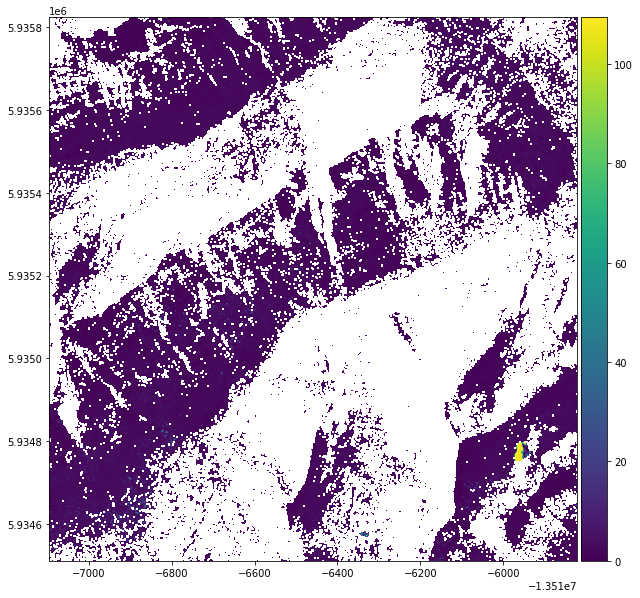

In [37]:
# Get path and chm filename
chm_file = dirname+'chm.tif' #/path/to/your/chm/chm.tif
chm_filename = os.path.basename(chm_file)
chm_filename = chm_filename.split(sep="_")

# Open the CHM file with GDAL
chm_dataset = gdal.Open(chm_file)

# Get the raster band object
chm_raster = chm_dataset.GetRasterBand(1)

# Get the NO DATA value
noDataVal = chm_raster.GetNoDataValue()

# Get required metadata from CHM file
cols_chm = chm_dataset.RasterXSize
rows_chm = chm_dataset.RasterYSize
bands_chm = chm_dataset.RasterCount
mapinfo_chm = chm_dataset.GetGeoTransform()
xMin = mapinfo_chm[0]
yMax = mapinfo_chm[3]
xMax = xMin + chm_dataset.RasterXSize / mapinfo_chm[1]
yMin = yMax + chm_dataset.RasterYSize / mapinfo_chm[5]
image_extent = (xMin, xMax, yMin, yMax)

chm_array = chm_raster.ReadAsArray(0, 0, cols_chm, rows_chm).astype(np.float)

# Plot the CHM figure
plot_chm(
    chm_array,
    image_extent,
    "Canopy height Model",
    "Canopy height (m)",
    "Greens",
    [0, 9],
)

## Conclusion

## Resources